
We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. Task:

fitting it to the periodic function
plot the fit Data Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
%matplotlib inline

Text(0,0.5,'Min and Max Temperature C')

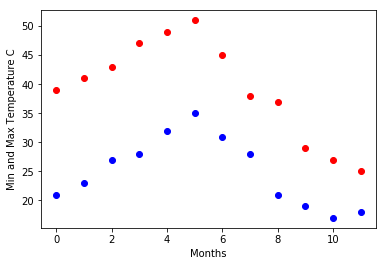

In [8]:

import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months=np.arange(12)
plt.plot(months,temp_max,'ro')
plt.plot(months,temp_min,'bo')
plt.xlabel("Months")
plt.ylabel("Min and Max Temperature C")

1. fitting it to the periodic function

In [9]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

2. plot the fit

Text(0,0.5,'Temperature ($^\\circ$C)')

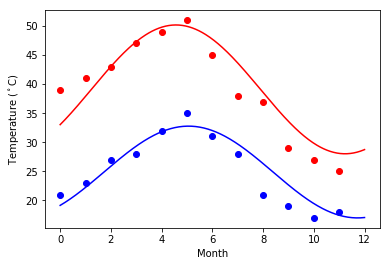

In [19]:
days = np.linspace(0, 12, 365)
plt.figure
plt.plot(months,temp_max,'ro')
plt.plot(months,temp_min,'bo')
plt.plot(days, yearly_temps(days, *res_max),'r-')
plt.plot(days, yearly_temps(days, *res_min),'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

([<matplotlib.patches.Wedge at 0x230e8cf2a20>,
 [Text(-0.989341,0.480837,'Female'), Text(0.989341,-0.480837,'Male')],
 [Text(-0.539641,0.262275,'35.6%'), Text(0.539641,-0.262275,'64.4%')])

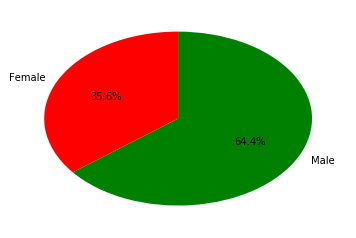

In [51]:
import pandas as pd
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
import matplotlib.pyplot as plt
gender=titanic.groupby('sex')
gender_count=list(gender.count()['pclass'])
sex=['Female','Male']
plt.pie(gender_count, labels=sex, colors=['r','g'], startangle=90, autopct='%.1f%%')

In [30]:
?plt.pie

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [99]:
df=titanic.groupby('sex')
print(df)

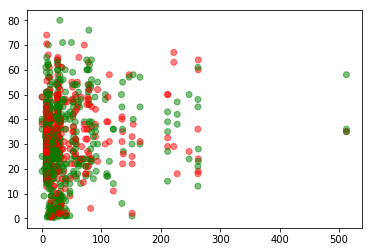

In [78]:
titanic_sex = titanic.dropna(subset=['sex'])

mapping = {'male' : 'green', 'female' : 'red'}
plt.scatter(titanic['fare'], titanic['age'], alpha=0.5 ,c=titanic_sex['sex'].map(mapping))


In [61]:
?plt.scatter